# 1. Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Import a Data-Set

In [ ]:
sn_file_name = "/content/drive/MyDrive/Data analytics course/Social_Network_Ads.csv"
sn_df = pd.read_csv(sn_file_name)
sn_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**#2**

In [ ]:
sn_df["Gender"] = sn_df["Gender"].map({"Male": 1, "Female": 0})

In [ ]:
sn_df

For exploration purpose - let's re-create Linear Regression and see - how it been trained.

In [ ]:
#X
independent_var = sn_df.iloc[:, 2:4].values # 2d masīvs

#y
dependent_var = sn_df.iloc[:, -1].values # vektors jeb 1 diemsnijas masīvs

**#2**

In [ ]:
independant_var

In [ ]:
dependant_var

#3. Feature Scaling

Now, we can do our feature scaling.

In [ ]:
sc_X = StandardScaler()
independent_var = sc_X.fit_transform(independent_var) #robežas Standartscaleim ir no -3 līdz 3

# 4. Split Data-Set into Training and Test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_var, dependent_var, test_size = 0.25, random_state = 0)

# 5. Training of Machine Learning Model with Linear Regression

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# 6. Run a Prediction

In [ ]:
print(nb_model.predict(sc_X.transform([[60, 40000]]))) #tikai transorm, jo sc_X jau uztrenēts

In [ ]:
y_pred = nb_model.predict(X_test) #šis jau skeilots (no skeilotā independent jau būvēts X_test, X_train....)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

Thus in binary classification: 

the count of true negatives is C{0,0}, false negatives is C{1,0}, 

false positives is C{0,1} and true positives is C{1,1}.

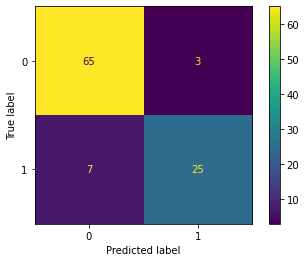

In [ ]:
plot_confusion_matrix(nb_model, X_test, y_test)

In [ ]:
accuracy_score(y_test, y_pred)*100 # accuracy procentos score modelim

90.0